In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
train = pd.read_csv('drive/My Drive/gc 2019 Patel Hall/train_upd.csv')
test = pd.read_csv('drive/My Drive/gc 2019 Patel Hall/test_upd.csv')
submission = pd.read_csv('drive/My Drive/gc 2019 Patel Hall/Sample_submission.csv')

In [0]:
train.isnull().sum().sum()

0

In [0]:
train.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


In [0]:
train.drop(['par_year','par_month'],1,inplace=True)
test.drop(['par_year','par_month'],1,inplace=True)

In [0]:
test.shape,train.shape

((26305, 36), (78560, 37))

In [0]:
byte_cols = []
for col in train.columns:
  if 'byte' in col:
    byte_cols.append(col)

In [0]:
"""for col in byte_cols:
  train[col+'_log'] = np.log(train[col] + 1)
  test[col+'_log'] = np.log(test[col] + 1)"""

"for col in byte_cols:\n  train[col+'_log'] = np.log(train[col] + 1)\n  test[col+'_log'] = np.log(test[col] + 1)"

In [0]:
test.shape,train.shape

((26305, 36), (78560, 37))

In [0]:
byte_cols = [ 'web_browsing_total_bytes',
       'video_total_bytes', 'social_ntwrking_bytes',
       'cloud_computing_total_bytes', 'web_security_total_bytes',
       'gaming_total_bytes', 'health_total_bytes', 'communication_total_bytes',
       'file_sharing_total_bytes', 'remote_access_total_bytes',
       'photo_sharing_total_bytes', 'software_dwnld_total_bytes',
       'marketplace_total_bytes', 'storage_services_total_bytes',
       'audio_total_bytes', 'location_services_total_bytes',
       'presence_total_bytes', 'advertisement_total_bytes',
       'system_total_bytes', 'voip_total_bytes', 'speedtest_total_bytes',
       'email_total_bytes', 'weather_total_bytes', 'media_total_bytes',
       'mms_total_bytes', 'others_total_bytes']
for col in byte_cols:
  col_ = col+'_sub'
  train[col_] = train[col]*train['subscriber_count']

In [0]:
def mget_dummies(df,columns):
    return pd.get_dummies(df,columns=columns)
  
train = mget_dummies(train,['ran_vendor'])
test  = mget_dummies(test,['ran_vendor'])

In [0]:
test.shape,train.shape

((26305, 38), (78560, 39))

In [0]:
#train.drop(['cell_name'],1,inplace=True)

In [0]:
X = train.drop(['Congestion_Type','cell_name'],axis=1).values
#y = train['Congestion_Type']

In [0]:
"""y.value_counts()
maps = {'NC':0,'4G_BACKHAUL_CONGESTION':1,'3G_BACKHAUL_CONGESTION':2,'4G_RAN_CONGESTION':3}
def encode_label(x):
    return maps[x]
y = y.apply(encode_label)"""

"y.value_counts()\nmaps = {'NC':0,'4G_BACKHAUL_CONGESTION':1,'3G_BACKHAUL_CONGESTION':2,'4G_RAN_CONGESTION':3}\ndef encode_label(x):\n    return maps[x]\ny = y.apply(encode_label)"

In [0]:
from sklearn.model_selection import train_test_split 


In [0]:
#X = train.drop('Congestion_Type',1).values
Y = train['Congestion_Type']

In [0]:
from sklearn.preprocessing import scale
#X = scale(X)

In [0]:
Y.value_counts()
maps = {'NC':0,'4G_BACKHAUL_CONGESTION':1,'3G_BACKHAUL_CONGESTION':2,'4G_RAN_CONGESTION':3}
def encode_label(x):
    return maps[x]
Y = Y.apply(encode_label)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state = 100) 

## Feature enginnering

In [0]:
train.shape,X.shape

((78560, 65), (78560, 64))

In [0]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


[ 13.4   15.8   18.2   20.57  22.93  25.28  27.63  29.97  32.3   34.63
  36.95  39.27  41.58  43.88  46.18  48.47  50.75  53.03  55.3   57.57
  59.84  62.09  64.34  66.58  68.82  71.05  73.27  75.46  77.05  78.63
  80.2   81.76  83.32  84.87  86.42  87.96  89.38  89.97  90.51  91.05
  91.58  92.1   92.58  93.03  93.43  93.82  94.21  94.6   94.99  95.38
  95.77  96.15  96.53  96.91  97.28  97.65  98.02  98.38  98.73  99.07
  99.41  99.72 100.02 100.02]


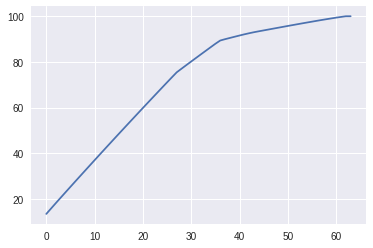

In [0]:
X_scaled = scale(X)

pca = PCA(n_components=64)

pca.fit(X_scaled)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print (var1)
plt.plot(var1)

In [0]:
#pca = PCA(n_components=55)
#pca.fit(X_scaled)
#X1=pca.fit_transform(X_scaled)

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = .25, random_state = 100) 

In [0]:
#X1.shape

(78560, 55)

In [0]:
"""from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)"""

In [0]:
"""tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)"""

In [0]:
#X_tsne = tsne.fit_transform(X)

In [0]:
#X_tsne.shape

In [0]:
!pip install catboost

In [0]:
def catboost_model(depth_ = 10,iterations_ =200,lr = .1):
  
  try:
    from catboost import CatBoostClassifier
  except:
    !pip install catboost
    from catboost import CatBoostClassifier

  model = CatBoostClassifier(eval_metric='MCC',iterations=iterations_,random_seed=0,depth=depth_,learning_rate=lr,loss_function = 'MultiClass',classes_count=4)

  model.fit(X_train, y_train,logging_level='Silent')


  acc_ = model.score(X_test,y_test)
  proba_ = model.predict_proba(X_test)
  predi_ =  model.predict(X_test)

  print("catboost's prediction accuracy is: ", acc_)
  print("catboost's mcc score: ", matthews_corrcoef(y_test, predi_)  )

  return model,proba_

In [0]:
catboost_model1, catboost_model1_prob = catboost_model(depth_ = 1,iterations_ =10000,lr = .1)
"""catboost's prediction accuracy is:  0.8060081466395111
catboost's mcc score:  0.7414617255207043(depth_ = 2,iterations_ =2000,lr = .1)
catboost's prediction accuracy is:  0.8073828920570265
catboost's mcc score:  0.7432962166730307(depth_ = 1,iterations_ =10000,lr = .1)
catboost's prediction accuracy is:  0.8074338085539715
catboost's mcc score:  0.7433573288074403(depth_ = 3,iterations_ =5000,lr = .05)"""

catboost's prediction accuracy is:  0.8073828920570265
catboost's mcc score:  0.7432962166730307


"catboost's prediction accuracy is:  0.8060081466395111\ncatboost's mcc score:  0.7414617255207043(depth_ = 2,iterations_ =2000,lr = .1)\ncatboost's prediction accuracy is:  0.8073828920570265\ncatboost's mcc score:  0.7432962166730307(depth_ = 1,iterations_ =10000,lr = .1)\ncatboost's prediction accuracy is:  0.8074338085539715\ncatboost's mcc score:  0.7433573288074403(depth_ = 3,iterations_ =5000,lr = .05)"

In [0]:
catboost_model2, catboost_model2_prob = catboost_model(depth_ = 2,iterations_ =2000,lr = .1)

catboost's prediction accuracy is:  0.8060081466395111
catboost's mcc score:  0.7414617255207043


In [0]:
catboost_model3, catboost_model3_prob = catboost_model(depth_ = 3,iterations_ =5000,lr = .05)

catboost's prediction accuracy is:  0.8074338085539715
catboost's mcc score:  0.7433573288074403


In [0]:

import pickle

filehandler = open("drive/My Drive/gc 2019 Patel Hall/catboost_models.pickle","wb")
pickle.dump([catboost_model1,catboost_model2,catboost_model3],filehandler)
filehandler.close()

In [0]:
def xgboost_model(lr=1,estima = 1000, depth_ = 5,gamma_=0):
  
  try:
    import xgboost as xgb
  except:
    pass
    
  model = xgb.XGBClassifier(learning_rate =lr,n_estimators=estima,max_depth=depth_,min_child_weight=1,gamma=gamma_,subsample=0.8,
     colsample_bytree=0.8,
     objective= 'multi:softprob',
     nthread=4,
     scale_pos_weight=1,
     seed=27,
     verbose_eval=True,
      num_class=4)

  model.fit(X_train, y_train)

  acc_ = model.score(X_test,y_test)
  proba_ = model.predict_proba(X_test)
  predi_ =  model.predict(X_test)

  print("xgboost's prediction accuracy is: ", acc_)
  print("xgboost's mcc score: ", matthews_corrcoef(y_test, predi_)  )

  return model,proba_

In [0]:
xgb_model_1,xgb_1_proba = xgboost_model(lr=1,estima = 1000, depth_ = 8,gamma_=0)

xgboost's prediction accuracy is:  0.7692973523421589
xgboost's mcc score:  0.6924439769742344


In [0]:
xgb_model_2,xgb_2_proba = xgboost_model(lr=1,estima = 2000, depth_ = 10,gamma_=0)

xgboost's prediction accuracy is:  0.7683299389002036
xgboost's mcc score:  0.6911273035022951


In [0]:
xgb_model_3,xgb_3_proba = xgboost_model(lr=1,estima = 1000, depth_ = 12,gamma_=0)

xgboost's prediction accuracy is:  0.765020366598778
xgboost's mcc score:  0.686743127305333


In [0]:
filehandler = open("drive/My Drive/gc 2019 Patel Hall/xgboost_models.pickle","wb")
pickle.dump([xgb_model_1,xgb_model_2,xgb_model_3],filehandler)
filehandler.close()

In [0]:
def gb_model(subsample_=0.8,n_estimators_=300,max_depth_=7):
  
  try:
    from sklearn.ensemble import GradientBoostingClassifier
  except:
    pass

  model = GradientBoostingClassifier(subsample=subsample_,n_estimators=n_estimators_,max_depth=max_depth_)
  model.fit(X_train, y_train)

  acc_ = model.score(X_test,y_test)
  proba_ = model.predict_proba(X_test)
  predi_ =  model.predict(X_test)

  print("GradientBoostingClassifier's prediction accuracy is: ", acc_)
  print("GradientBoostingClassifier's mcc score: ", matthews_corrcoef(y_test, predi_)  )
      
  return model,proba_

In [0]:
#gb_model_1,gb_1_proba =  gb_model(subsample_=0.8,n_estimators_=1500,max_depth_=1)

GradientBoostingClassifier's prediction accuracy is:  0.795061099796334
GradientBoostingClassifier's mcc score:  0.726877430627679


In [0]:
gb_model_2,gb_2_proba =  gb_model(subsample_=0.8,n_estimators_=3000,max_depth_=1)

GradientBoostingClassifier's prediction accuracy is:  0.8012219959266802
GradientBoostingClassifier's mcc score:  0.7350903673788269


In [0]:
#gb_model_3,gb_3_proba =  gb_model(subsample_=0.7,n_estimators_=3000,max_depth_=2)

In [0]:
filehandler = open("drive/My Drive/gc 2019 Patel Hall/gb_models.pickle","wb")
pickle.dump([gb_model_2],filehandler)
filehandler.close()

In [0]:
def lgbm_model(colsample_bytree=.1348,learning_rate = .35, 
                             max_depth = 2, n_estimators = 575, 
                             reg_alpha = .9643, reg_lambda=.5, subsample = .9):
  
  try:
    import lightgbm as lgb
  except:
    pass

  model = lgb.LGBMClassifier(colsample_bytree=colsample_bytree,learning_rate = learning_rate, 
                             max_depth = max_depth, n_estimators = n_estimators, 
                             reg_alpha = reg_alpha, reg_lambda=reg_lambda, subsample = subsample)
  model.fit(X_train, y_train)

  acc_ = model.score(X_test,y_test)
  proba_ = model.predict_proba(X_test)
  predi_ =  model.predict(X_test)

  print("lgbm's prediction accuracy is: ", acc_)
  print("lgbm's mcc score: ", matthews_corrcoef(y_test, predi_)  )
      
  return model,proba_

In [0]:
#lgbm_model_1,lgbm_1_proba = lgbm_model()


In [0]:
lgbm_model_2,lgbm_2_proba = lgbm_model(colsample_bytree=.1348,learning_rate = .35, 
                             max_depth = 2, n_estimators = 575, 
                             reg_alpha = .9643, reg_lambda=.5, subsample = .9)
"""lgbm's prediction accuracy is:  0.8026985743380856
lgbm's mcc score:  0.7370930459564444(colsample_bytree=.1348,learning_rate = .35, 
                             max_depth = 2, n_estimators = 575, 
                             reg_alpha = .9643, reg_lambda=.5, subsample = .9)"""

lgbm's prediction accuracy is:  0.8026985743380856
lgbm's mcc score:  0.7370930459564444


"lgbm's prediction accuracy is:  0.8026985743380856\nlgbm's mcc score:  0.7370930459564444(colsample_bytree=.1348,learning_rate = .35, \n                             max_depth = 2, n_estimators = 575, \n                             reg_alpha = .9643, reg_lambda=.5, subsample = .9)"

In [0]:
lgbm_model_3,lgbm_3_proba = lgbm_model(colsample_bytree=.3,learning_rate = .3, 
                             max_depth = 1, n_estimators = 2150, 
                             reg_alpha = .7, reg_lambda=.5, subsample = .9)
"""lgbm's prediction accuracy is:  0.8053462321792261
lgbm's mcc score:  0.7406071480618112(colsample_bytree=.3,learning_rate = .3, 
                             max_depth = 1, n_estimators = 2150, 
                             reg_alpha = .7, reg_lambda=.5, subsample = .9)"""

lgbm's prediction accuracy is:  0.8053462321792261
lgbm's mcc score:  0.7406071480618112


"lgbm's prediction accuracy is:  0.8053462321792261\nlgbm's mcc score:  0.7406071480618112(colsample_bytree=.3,learning_rate = .3, \n                             max_depth = 1, n_estimators = 2150, \n                             reg_alpha = .7, reg_lambda=.5, subsample = .9)"

In [0]:
filehandler = open("drive/My Drive/gc 2019 Patel Hall/lgbm_models.pickle","wb")
pickle.dump([lgbm_model_2,lgbm_model_3],filehandler)
filehandler.close()

In [0]:
catboost_model1_prob 

array([[1.69472434e-04, 6.56022267e-01, 2.08595201e-01, 1.35213059e-01],
       [2.66900799e-07, 4.88461298e-01, 2.45739068e-03, 5.09081044e-01],
       [1.14432845e-10, 3.70308629e-02, 3.80569202e-06, 9.62965331e-01],
       ...,
       [9.95543696e-01, 3.80455279e-06, 4.45248354e-03, 1.60817708e-08],
       [3.49645668e-07, 6.17384892e-01, 3.52877361e-03, 3.79085985e-01],
       [3.56419391e-04, 6.81886417e-01, 1.63792728e-01, 1.53964435e-01]])

In [0]:
catboost_model1_prob.shape, np.concatenate((catboost_model1_prob,catboost_model2_prob),axis=1).shape

((19640, 4), (19640, 8))

In [0]:
final = np.concatenate((catboost_model1_prob,catboost_model2_prob,catboost_model3_prob,
                gb_2_proba,lgbm_2_proba,lgbm_3_proba),axis=1)

In [0]:
final.shape

(19640, 24)

In [0]:
train_final = catboost_model1.predict_proba(X_train)
train_final.shape

(58920, 4)

In [0]:

for model_ in [catboost_model2,catboost_model3,
    gb_model_2,lgbm_model_2,lgbm_model_3]:
  
  train_final = np.concatenate((model_.predict_proba(X_train),train_final),axis= 1)
  print(train_final.shape)

(58920, 8)
(58920, 12)
(58920, 16)
(58920, 20)
(58920, 24)


In [0]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.layers import LeakyReLU

In [0]:
y_train_new = to_categorical(y_train, 4)
y_test_new = to_categorical(y_test, 4)

In [0]:
from keras import backend as K


def precision(y_true, y_pred):	
    """Precision metric.	
    Only computes a batch-wise average of precision. Computes the precision, a
    metric for multi-label classification of how many selected items are
    relevant.
    """	
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))	
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))	
    precision = true_positives / (predicted_positives + K.epsilon())	
    return precision

def recall(y_true, y_pred):	
    """Recall metric.	
    Only computes a batch-wise average of recall. Computes the recall, a metric
    for multi-label classification of how many relevant items are selected.	
    """	
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))	
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))	
    recall = true_positives / (possible_positives + K.epsilon())	
    return recall

def f1_score(y_true, y_pred):
    """Computes the F1 Score
    Only computes a batch-wise average of recall. Computes the recall, a metric
    for multi-label classification of how many relevant items are selected.	
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return (2 * p * r) / (p + r + K.epsilon())

  
"""
TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
TP_FP = K.sum(K.round(K.clip(y_pred, 0, 1)))	
TP_FN = K.sum(K.round(K.clip(y_true, 0, 1)))	
FP = TP_FP - TP
FN = TP_FN - TP
TN = np.logical_and(K.eval(y_true) == 0, K.eval(y_pred) == 0)
TN = K.sum(K.variable(TN))

return ((TP*TN)-(FP*FN))/ K.sqrt(((TP+FN)*(TP+FN)*(TN+FP)*(TN+FN))+K.epsilon())"""
"""
tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
p = precision(y_true, y_pred)
r = recall(y_true, y_pred)
N =  K.cast(K.shape(y_true)[0], dtype='float32')
return ((p*r)- 1)/(K.sqrt(  ((r*N )- tp)-((p*N) -tp) )+ K.epsilon() )
"""
def MCC_(y_true, y_pred):
    TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    TP_FP = K.sum(K.round(K.clip(y_pred, 0, 1)))	
    TP_FN = K.sum(K.round(K.clip(y_true, 0, 1)))	
    FP = TP_FP - TP
    FN = TP_FN - TP
    TN = K.cast(K.shape(y_true)[0], dtype='float32') - FN


    return ((TP*TN)-(FP*FN))/ K.sqrt(((TP+FN)*(TP+FN)*(TN+FP)*(TN+FN))+K.epsilon())
  

In [0]:
model = models.Sequential()
model.add(Dense(30, activation='tanh', input_shape=(24,)))
model.add(Dropout(0.45))
model.add(Dense(4, activation='softmax'))

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[MCC_])

# Train model
model.fit(train_final, y_train_new,
          batch_size=100000,
          epochs=300,
          verbose=1)

score = model.evaluate(final, y_test_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:
model.predict(final),np.argmax(model.predict(final),axis=1)

(array([[0.00954379, 0.787024  , 0.1197862 , 0.083646  ],
        [0.0039159 , 0.6812699 , 0.01834857, 0.29646578],
        [0.00192063, 0.04563519, 0.00167311, 0.95077115],
        ...,
        [0.97393155, 0.00191331, 0.02269132, 0.00146377],
        [0.00461415, 0.58022237, 0.01652284, 0.3986407 ],
        [0.00390046, 0.836822  , 0.03217414, 0.12710345]], dtype=float32),
 array([1, 1, 3, ..., 0, 1, 1]))

In [0]:
matthews_corrcoef(y_test, np.argmax(model.predict(final),axis=1))  

0.7424778361534832

In [0]:
0.744(30,.45,'adam')